<a href="https://colab.research.google.com/github/sne6/Flight-delay-DA/blob/main/FlightDelay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Load datasets**

In [ ]:
flights_df = pd.read_csv('flights.csv')
airlines_df = pd.read_csv('airlines.csv')
airports_df = pd.read_csv('airports.csv')

/tmp/ipython-input-11-1987677916.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights_df = pd.read_csv('flights.csv')


# **Explore Data**

In [ ]:
print(flights_df.info())
print(airlines_df.info())
print(airports_df.info())
print(flights_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

# **Clean the data**

In [ ]:
print(flights_df.isnull().sum())

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64


In [ ]:
flights_clean = flights_df[(flights_df['CANCELLED']==0)&(flights_df['DIVERTED']==0)]


In [ ]:
flights_clean = flights_clean.dropna(subset=['DEPARTURE_DELAY','ARRIVAL_DELAY'])

In [ ]:
flights_clean = flights_clean[
    (flights_clean['ARRIVAL_DELAY'].abs()<1000)&
    (flights_clean['DEPARTURE_DELAY'].abs()<1000)
]

In [ ]:
flights_clean['TAIL_NUMBER'] = flights_clean['TAIL_NUMBER'].fillna('Unknown')
flights_clean.isnull().sum()

,0
YEAR,0
MONTH,0
DAY,0
DAY_OF_WEEK,0
AIRLINE_x,0
FLIGHT_NUMBER,0
TAIL_NUMBER,0
ORIGIN_AIRPORT,0
DESTINATION_AIRPORT,0
SCHEDULED_DEPARTURE,0


**Merging**

In [ ]:
flights_clean = flights_clean.merge(airlines_df, how='left', left_on='AIRLINE', right_on='IATA_CODE')
flights_clean = flights_clean.merge(airports_df, how='left', left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', suffixes=('', '_ORIGIN'))
flights_clean = flights_clean.merge(airports_df, how='left', left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', suffixes=('', '_DEST'))

In [ ]:
flights_clean = flights_clean.drop(columns=['IATA_CODE_ORIGIN', 'IATA_CODE_DEST'])

In [ ]:
print(flights_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5713732 entries, 0 to 5713731
Data columns (total 45 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE_x            object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

# **Exploratory Data Analysis**

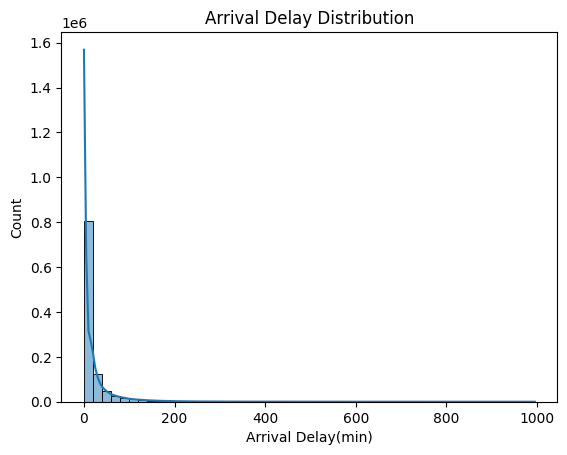

In [ ]:
sns.histplot(flights_clean['AIRLINE_DELAY'], bins=50, kde=True)
plt.title('Arrival Delay Distribution')
plt.xlabel('Arrival Delay(min)')
plt.show()

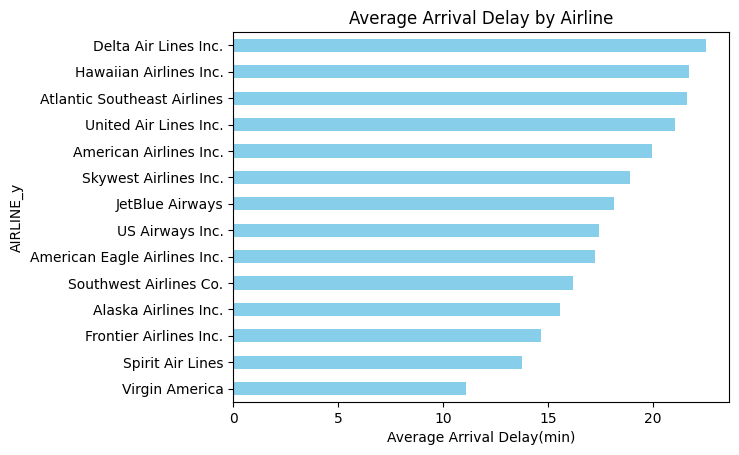

In [ ]:
airline_delay = flights_clean.groupby('AIRLINE_y')['AIRLINE_DELAY'].mean().sort_values()
airline_delay.plot(kind='barh', color='skyblue')
plt.title('Average Arrival Delay by Airline')
plt.xlabel('Average Arrival Delay(min)')
plt.show()

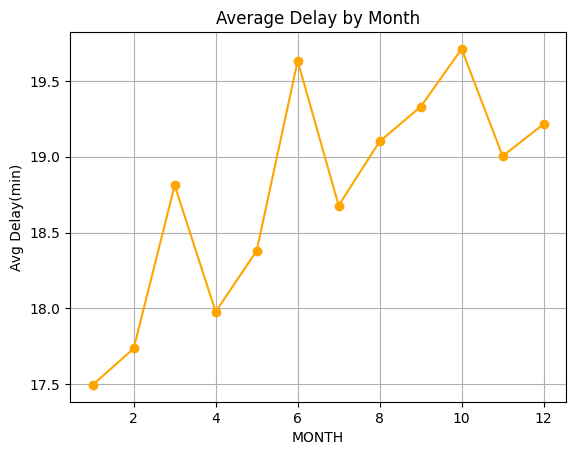

In [ ]:
monthly_delay = flights_clean.groupby('MONTH')['AIRLINE_DELAY'].mean()
monthly_delay.plot(marker='o', color='orange')
plt.title('Average Delay by Month')
plt.ylabel('Avg Delay(min)')
plt.grid(True)
plt.show()


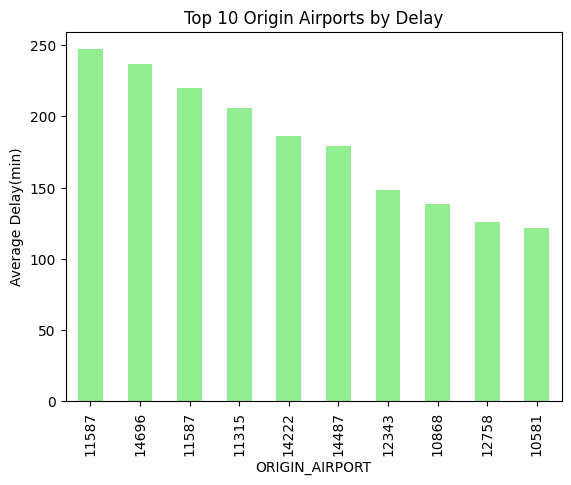

In [ ]:
top_airport_delay = flights_clean.groupby('ORIGIN_AIRPORT')['AIRLINE_DELAY'].mean().sort_values(ascending=False).head(10)
top_airport_delay.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Origin Airports by Delay')
plt.ylabel('Average Delay(min)')
plt.show()

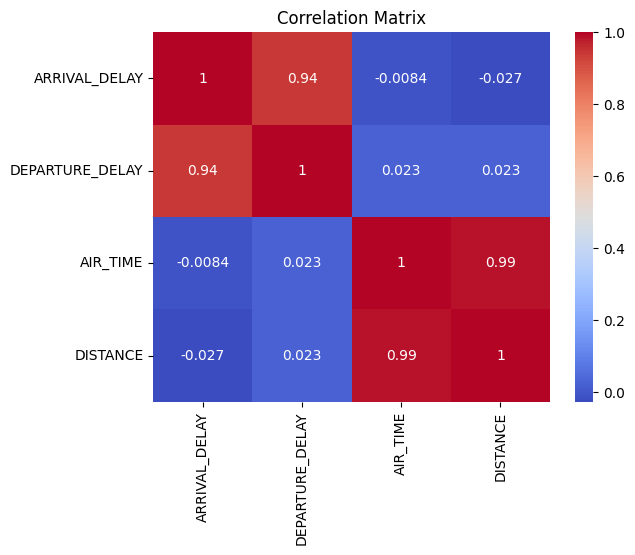

In [ ]:
corr=flights_clean[['ARRIVAL_DELAY','DEPARTURE_DELAY','AIR_TIME','DISTANCE']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()